In [3]:
import pandas as pd

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [80]:
X.head()

,age,balance,campaign,pdays,previous,job_0,job_1,job_2,job_3,job_4,...,day_of_week_25,day_of_week_26,day_of_week_27,day_of_week_28,day_of_week_29,day_of_week_30,default_0,default_1,housing_0,housing_1
0,33,882,1,151,3,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,42,-247,1,166,1,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,33,3444,1,91,4,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,36,2415,1,86,4,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,36,0,1,143,3,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [82]:
y

0        0
1        1
2        1
3        0
4        1
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

In [8]:
data = pd.concat([X , y ], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [9]:
import matplotlib.pyplot as plt

In [10]:
class DataExplorer:
    
    def __init__(self, data_frame):
        self.data_frame = data_frame
        self.grouped_data = data_frame.groupby("y")
        self.class_no = "no"
        self.class_yes = "yes"
        self.group_no = self.grouped_data.get_group(self.class_no)
        self.group_yes = self.grouped_data.get_group(self.class_yes)

    def visualize_continuous_feature(self, column, bins):
        plt.figure()
        plt.hist(self.group_no[column], bins=bins, alpha=0.6, label=self.class_no, color='red')
        plt.hist(self.group_yes[column], bins=bins, alpha=0.6, label=self.class_yes, color='blue')
        plt.legend(loc='best')
        plt.title(f"Distribution of {column}")
        plt.xlabel(f"{column} Values")
        plt.ylabel("Frequency")
        plt.grid(True)

    def visualize_categorical_feature(self, column):
        count_df = pd.DataFrame({
            self.class_no: self.group_no[column].value_counts(),
            self.class_yes: self.group_yes[column].value_counts()
        })
        
        count_df.plot(kind='bar', alpha=0.7)
        plt.title(f"{column} Category Distribution")
        plt.xlabel("Unique Values")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()


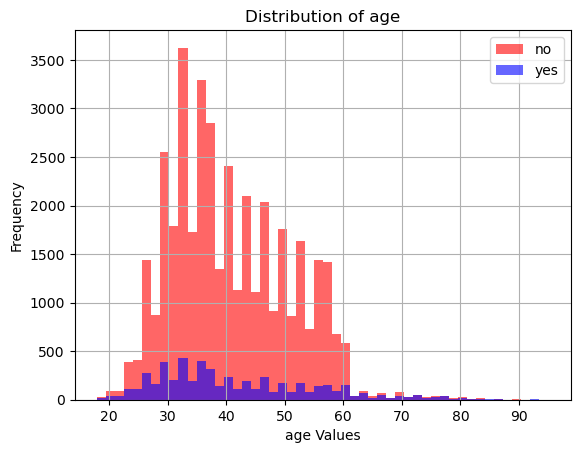

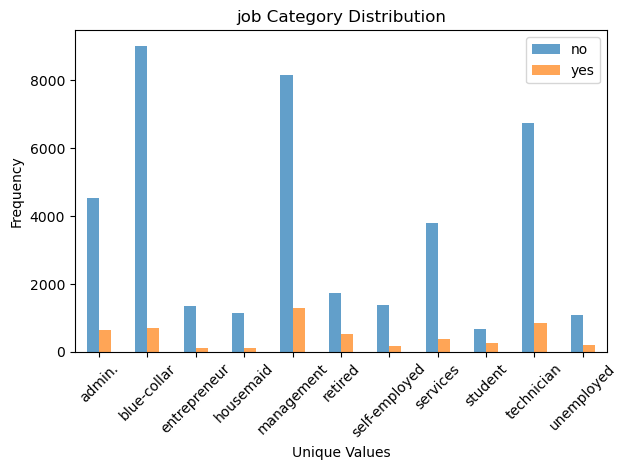

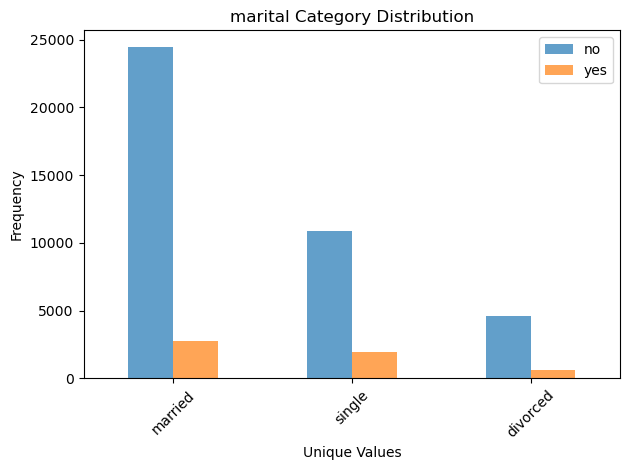

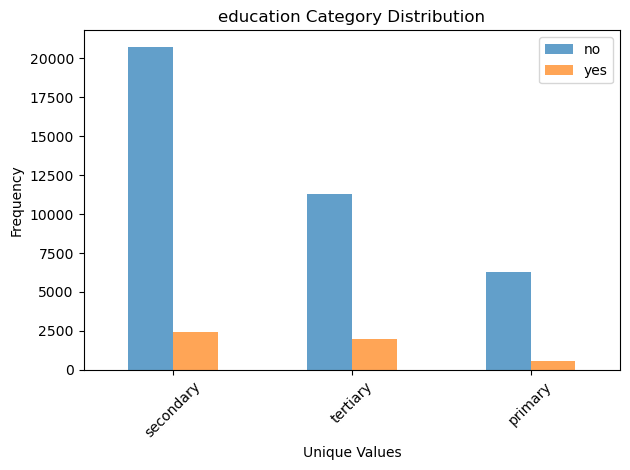

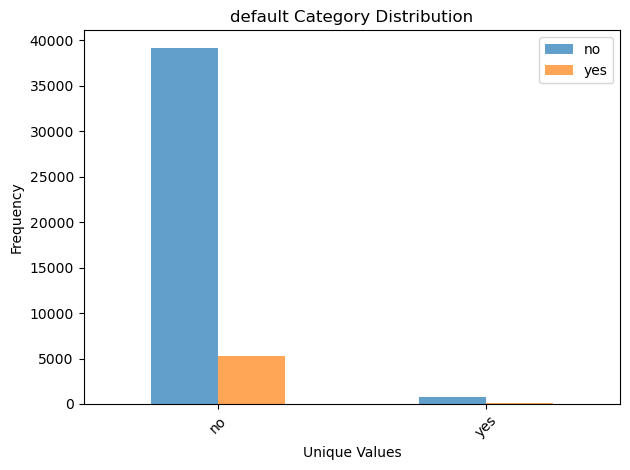

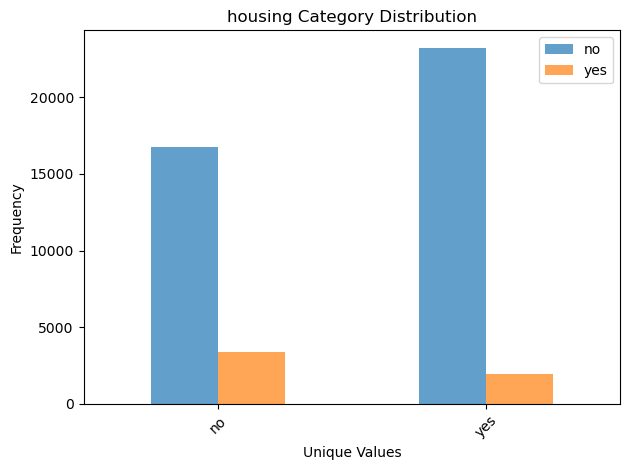

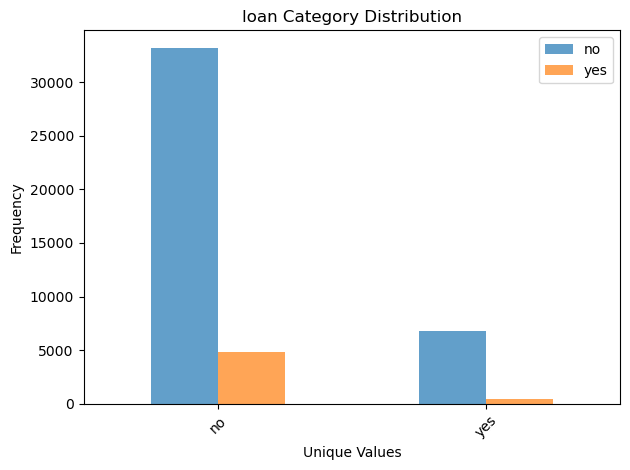

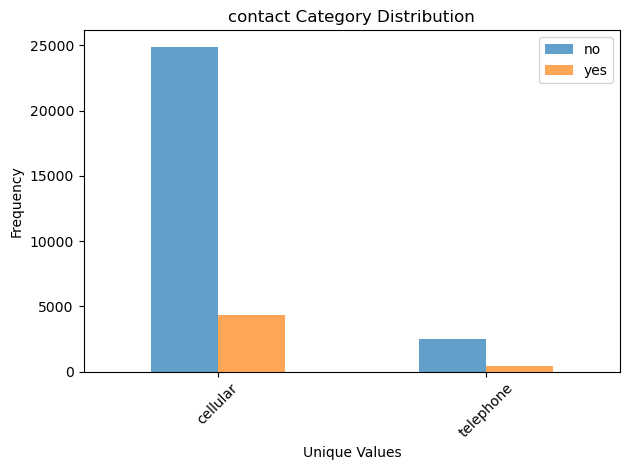

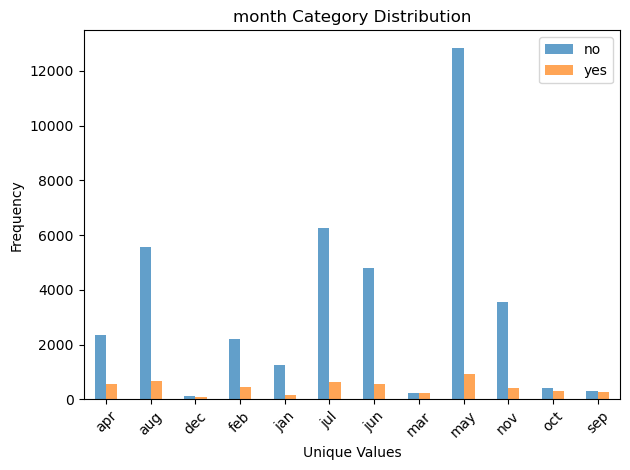

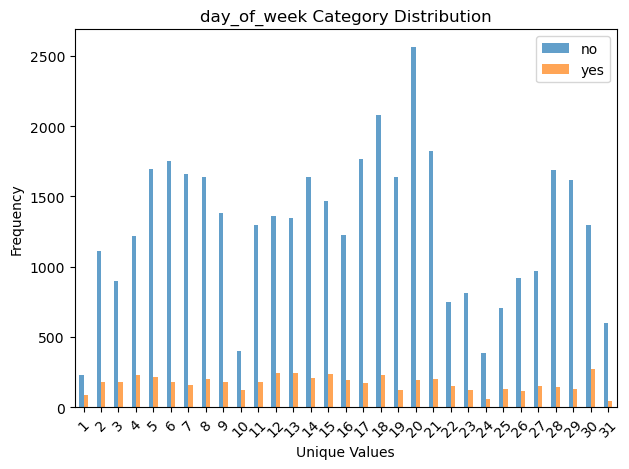

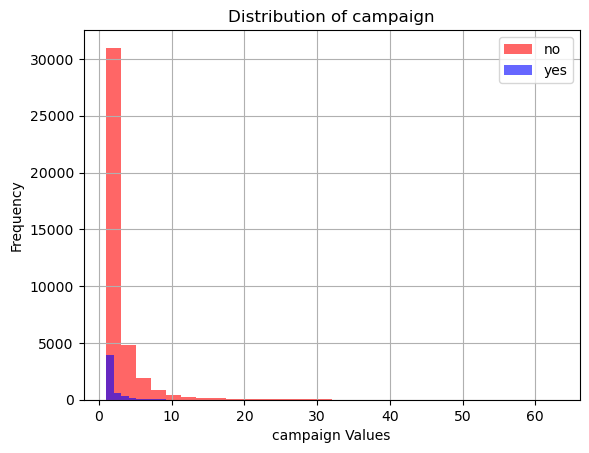

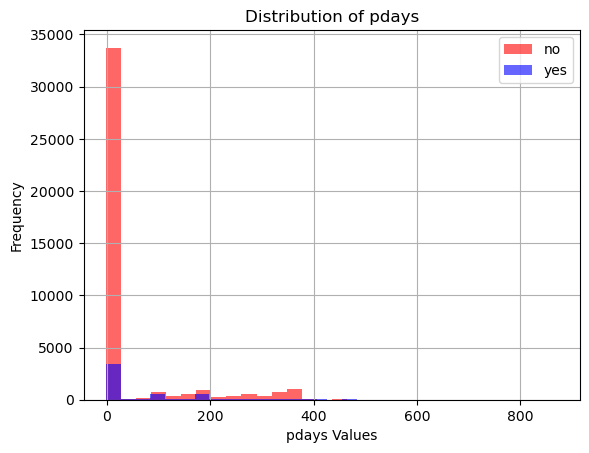

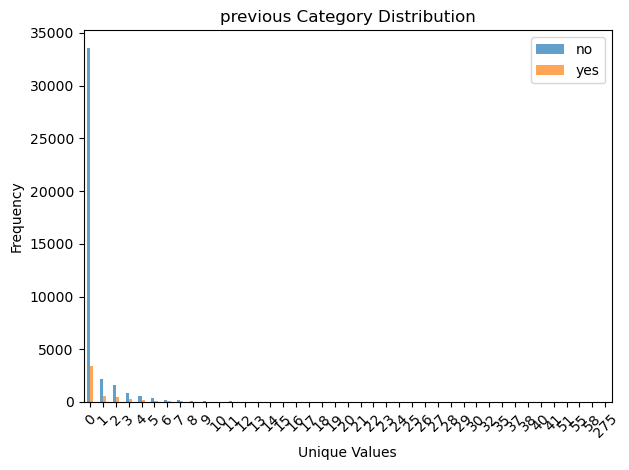

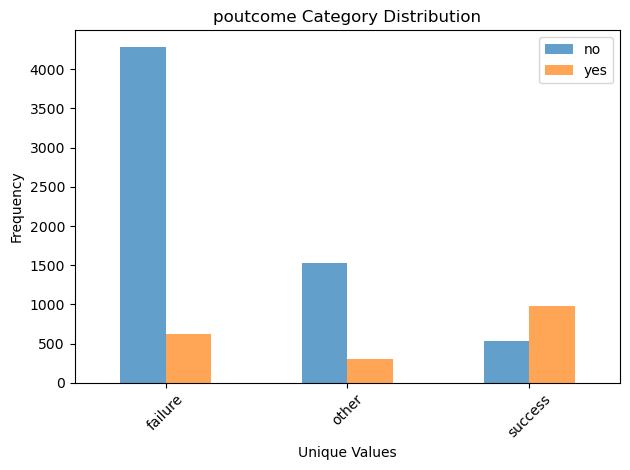

In [11]:
explore = DataExplorer(data)

### Feature 1 - AGE
explore.visualize_continuous_feature("age", 50)

### Feature 2 - JOB
explore. visualize_categorical_feature("job")

### Feature 3 - MARITAL
explore. visualize_categorical_feature("marital")

### Feature 4 - EDUCATION
explore. visualize_categorical_feature("education")

### Feature 5 - DEFAULT
explore. visualize_categorical_feature("default")

### Feature 6 - HOUSING
explore. visualize_categorical_feature("housing")

### Feature 7 - LOAN
explore. visualize_categorical_feature("loan")

### Feature 8 - CONTACT
explore. visualize_categorical_feature("contact")

### Feature 9 - MONTH
explore. visualize_categorical_feature("month")

### Feature 10 - DAY OF WEEK
explore. visualize_categorical_feature("day_of_week")

### Feature 11 - CAMPAIGN
explore.visualize_continuous_feature("campaign", 30)

### Feature 12 - PDAYS
explore.visualize_continuous_feature("pdays", 30)

### Feature 13 - PREVIOUS
explore. visualize_categorical_feature("previous")

### Feature 14 - POUTCOME
explore. visualize_categorical_feature("poutcome")


In [12]:
data["y"].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:

data.drop(["duration"] , axis=1,inplace=True)


In [14]:
import numpy as np

In [15]:
data.replace('unknown' , np.NaN , inplace=True)

In [16]:
data.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
    


def convert_cata(df, cols):
    for i in cols:
        df[i] = df[i].astype("category").cat.codes
    return df

def fillMissing(missing_cols, df):
    df1 = df.copy()
    for col in missing_cols:
        df1 = convert_cata(df1, ['job', 'marital', 'education', 'loan', 'contact', 'month', 'poutcome', 'y', "default", "housing", "day_of_week"])
        test = df1[df1[col] == -1]
        train = df1[df1[col] != -1]

        # Skip prediction if test is empty
        if len(test) == 0:
            continue

        tree = DecisionTreeClassifier()
        tree.fit(train.drop(col, axis=1), train[col])

        # Predict only if test is not empty
        if not test.empty:
            test.loc[:, col] = tree.predict(test.drop(col, axis=1))

        # Concatenate train and updated test
        df1 = pd.concat([train, test])

    df1.replace(-1, np.NaN, inplace=True)
    return df1


In [18]:

df1 = fillMissing(["job" , "marital","education","balance" , "loan","default" ,"housing" , "pdays"],data.copy())
df1.shape

(45211, 16)

In [19]:
df1.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,1,-1,0,NaN,no


In [21]:
df1.reset_index(inplace=True , drop=True)

In [22]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,33,0,1,3,0,882,0,0,2,20,10,1,151,3,1,0
1,42,0,2,2,0,-247,1,1,2,20,10,1,166,1,2,1
2,33,7,1,2,0,3444,1,0,2,20,10,1,91,4,1,1
3,36,4,1,3,0,2415,1,0,2,21,10,1,86,4,2,0
4,36,4,1,3,0,0,1,0,2,22,10,1,143,3,1,1


In [23]:
cat_cols = ['job','marital','education','loan','contact','month','poutcome',"day_of_week","default" ,"housing" ]

for col in cat_cols:
    df1 = df1.join(pd.get_dummies(df1[col],prefix = col))

keep = [col for col in df1.columns if col not in cat_cols]
df1 = df1 [keep]

In [24]:
df1.head()

,age,balance,campaign,pdays,previous,y,job_0,job_1,job_2,job_3,...,day_of_week_25,day_of_week_26,day_of_week_27,day_of_week_28,day_of_week_29,day_of_week_30,default_0,default_1,housing_0,housing_1
0,33,882,1,151,3,0,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,42,-247,1,166,1,1,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,33,3444,1,91,4,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,36,2415,1,86,4,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,36,0,1,143,3,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [25]:
y = df1['y']  # Target column
X = df1.drop('y', axis=1)  # Features (everything except the target)

# Check the shapes of X and y
X.shape, y.shape


((45211, 79), (45211,))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (31647, 79)
Number transactions y_train dataset:  (31647,)
Number transactions X_test dataset:  (13564, 79)
Number transactions y_test dataset:  (13564,)


In [27]:
print(df1[df1['y']==1].shape[0])
print(df1[df1['y']==0].shape[0])

5289
39922


In [33]:
from imblearn.over_sampling import SMOTE


In [39]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3723
Before OverSampling, counts of label '0': 27924 

After OverSampling, the shape of train_X: (55848, 79)
After OverSampling, the shape of train_y: (55848,) 

After OverSampling, counts of label '1': 27924
After OverSampling, counts of label '0': 27924


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_res , y_train_res.ravel())
predictions = model.predict(X_test)

c:\Users\m7md3\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'C': np.linspace(1, 10, 10)
             }

clf = GridSearchCV(model, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\m7md3\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [56]:
clf.best_params_

{'C': 6.0}

In [79]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report , accuracy_score

model = LogisticRegression(C=6,penalty='l2', verbose=5,solver="lbfgs",max_iter=150)

model.fit(X_train_res , y_train_res)
y_pred = model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
model.score(X_test,y_test)
     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\m7md3\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


0.8571217929814214